In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cấu hình biểu đồ
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# 1. Load data
df = pd.read_csv('pjm_processed.csv')

# Chuyển đổi datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

# Thiết lập datetime làm index để dễ dàng slicing/resampling
df.set_index('datetime', inplace=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145224 entries, 2002-01-08 01:00:00 to 2018-08-03 00:00:00
Data columns (total 70 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PJME_MW             145224 non-null  float64
 1   hour                145224 non-null  int64  
 2   dayofweek           145224 non-null  int64  
 3   dayofmonth          145224 non-null  int64  
 4   dayofyear           145224 non-null  int64  
 5   month               145224 non-null  int64  
 6   quarter             145224 non-null  int64  
 7   year                145224 non-null  int64  
 8   weekofyear          145224 non-null  int64  
 9   is_weekend          145224 non-null  int64  
 10  is_month_start      145224 non-null  int64  
 11  is_month_end        145224 non-null  int64  
 12  hour_category       145224 non-null  object 
 13  is_peak_hour        145224 non-null  int64  
 14  is_business_hour    145224 non-null  int64  
 15  

,PJME_MW,hour,dayofweek,dayofmonth,dayofyear,month,quarter,year,weekofyear,is_weekend,...,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,dayofmonth_sin,dayofmonth_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2002-01-08 01:00:00,29445.0,1,1,8,8,1,1,2002,2,0,...,0.258819,0.965926,0.781831,0.62349,0.998717,-0.050649,0.5,0.866025,0.137279,0.990532
2002-01-08 02:00:00,28670.0,2,1,8,8,1,1,2002,2,0,...,0.500000,0.866025,0.781831,0.62349,0.998717,-0.050649,0.5,0.866025,0.137279,0.990532
2002-01-08 03:00:00,28375.0,3,1,8,8,1,1,2002,2,0,...,0.707107,0.707107,0.781831,0.62349,0.998717,-0.050649,0.5,0.866025,0.137279,0.990532
2002-01-08 04:00:00,28542.0,4,1,8,8,1,1,2002,2,0,...,0.866025,0.500000,0.781831,0.62349,0.998717,-0.050649,0.5,0.866025,0.137279,0.990532
2002-01-08 05:00:00,29261.0,5,1,8,8,1,1,2002,2,0,...,0.965926,0.258819,0.781831,0.62349,0.998717,-0.050649,0.5,0.866025,0.137279,0.990532


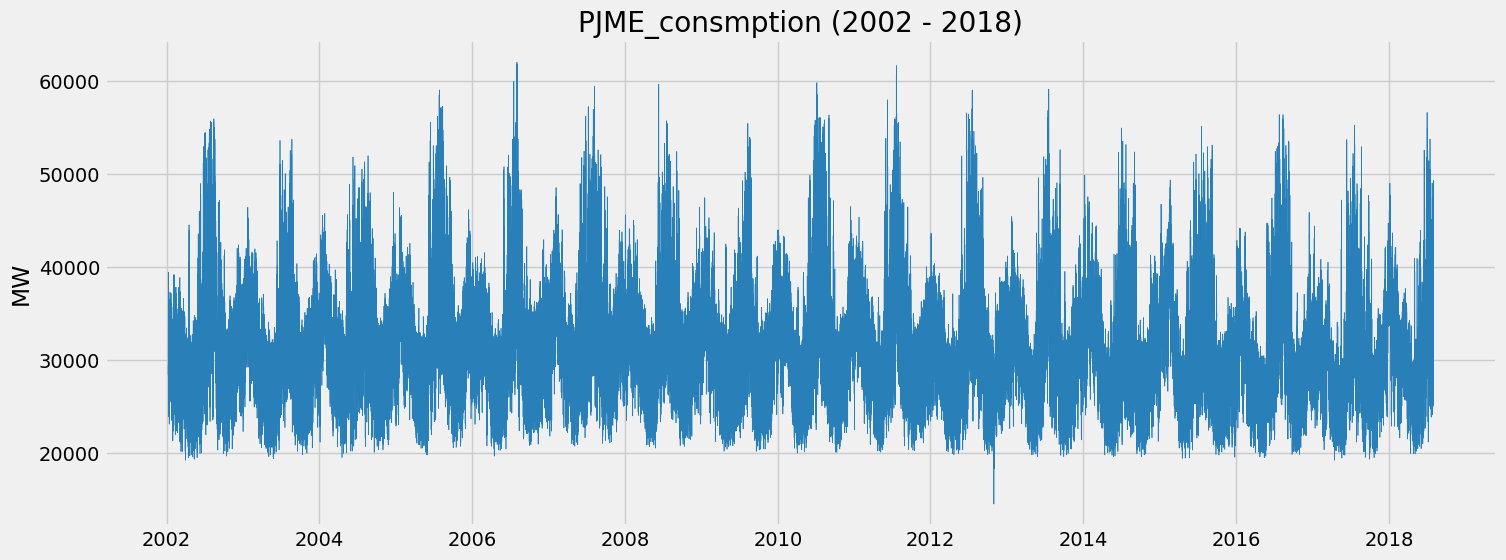

C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\2122870070.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['PJME_MW'].resample('M').mean()


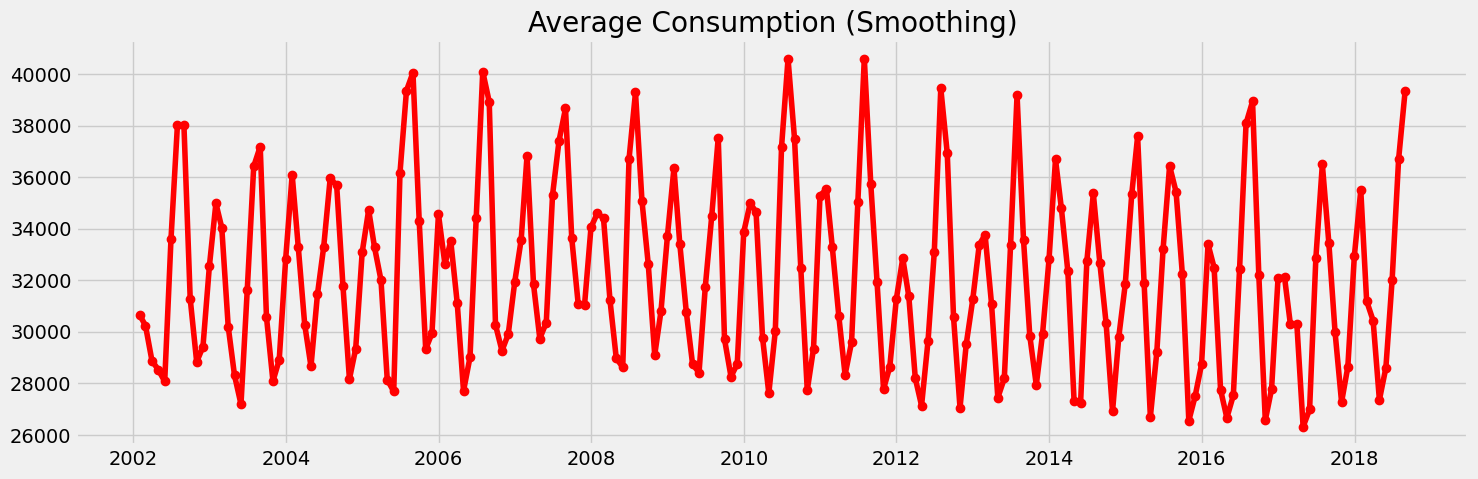

In [2]:
## Biểu đồ tổng quan qua các năm
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['PJME_MW'], color='#2980b9', linewidth=0.5)
plt.title('PJME_consmption (2002 - 2018)')
plt.ylabel('MW')
plt.show()

## Resampling theo tháng để thấy xu hướng rõ hơn
df_monthly = df['PJME_MW'].resample('M').mean()
plt.figure(figsize=(16, 5))
plt.plot(df_monthly, marker='o', linestyle='-', color='red')
plt.title('Average Consumption (Smoothing)')
plt.show()

C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\635498517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='PJME_MW', ax=axes[0], palette='viridis')
C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\635498517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofweek', y='PJME_MW', ax=axes[1], palette='magma')
C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\635498517.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', ax=axes[2], palette='rocket')


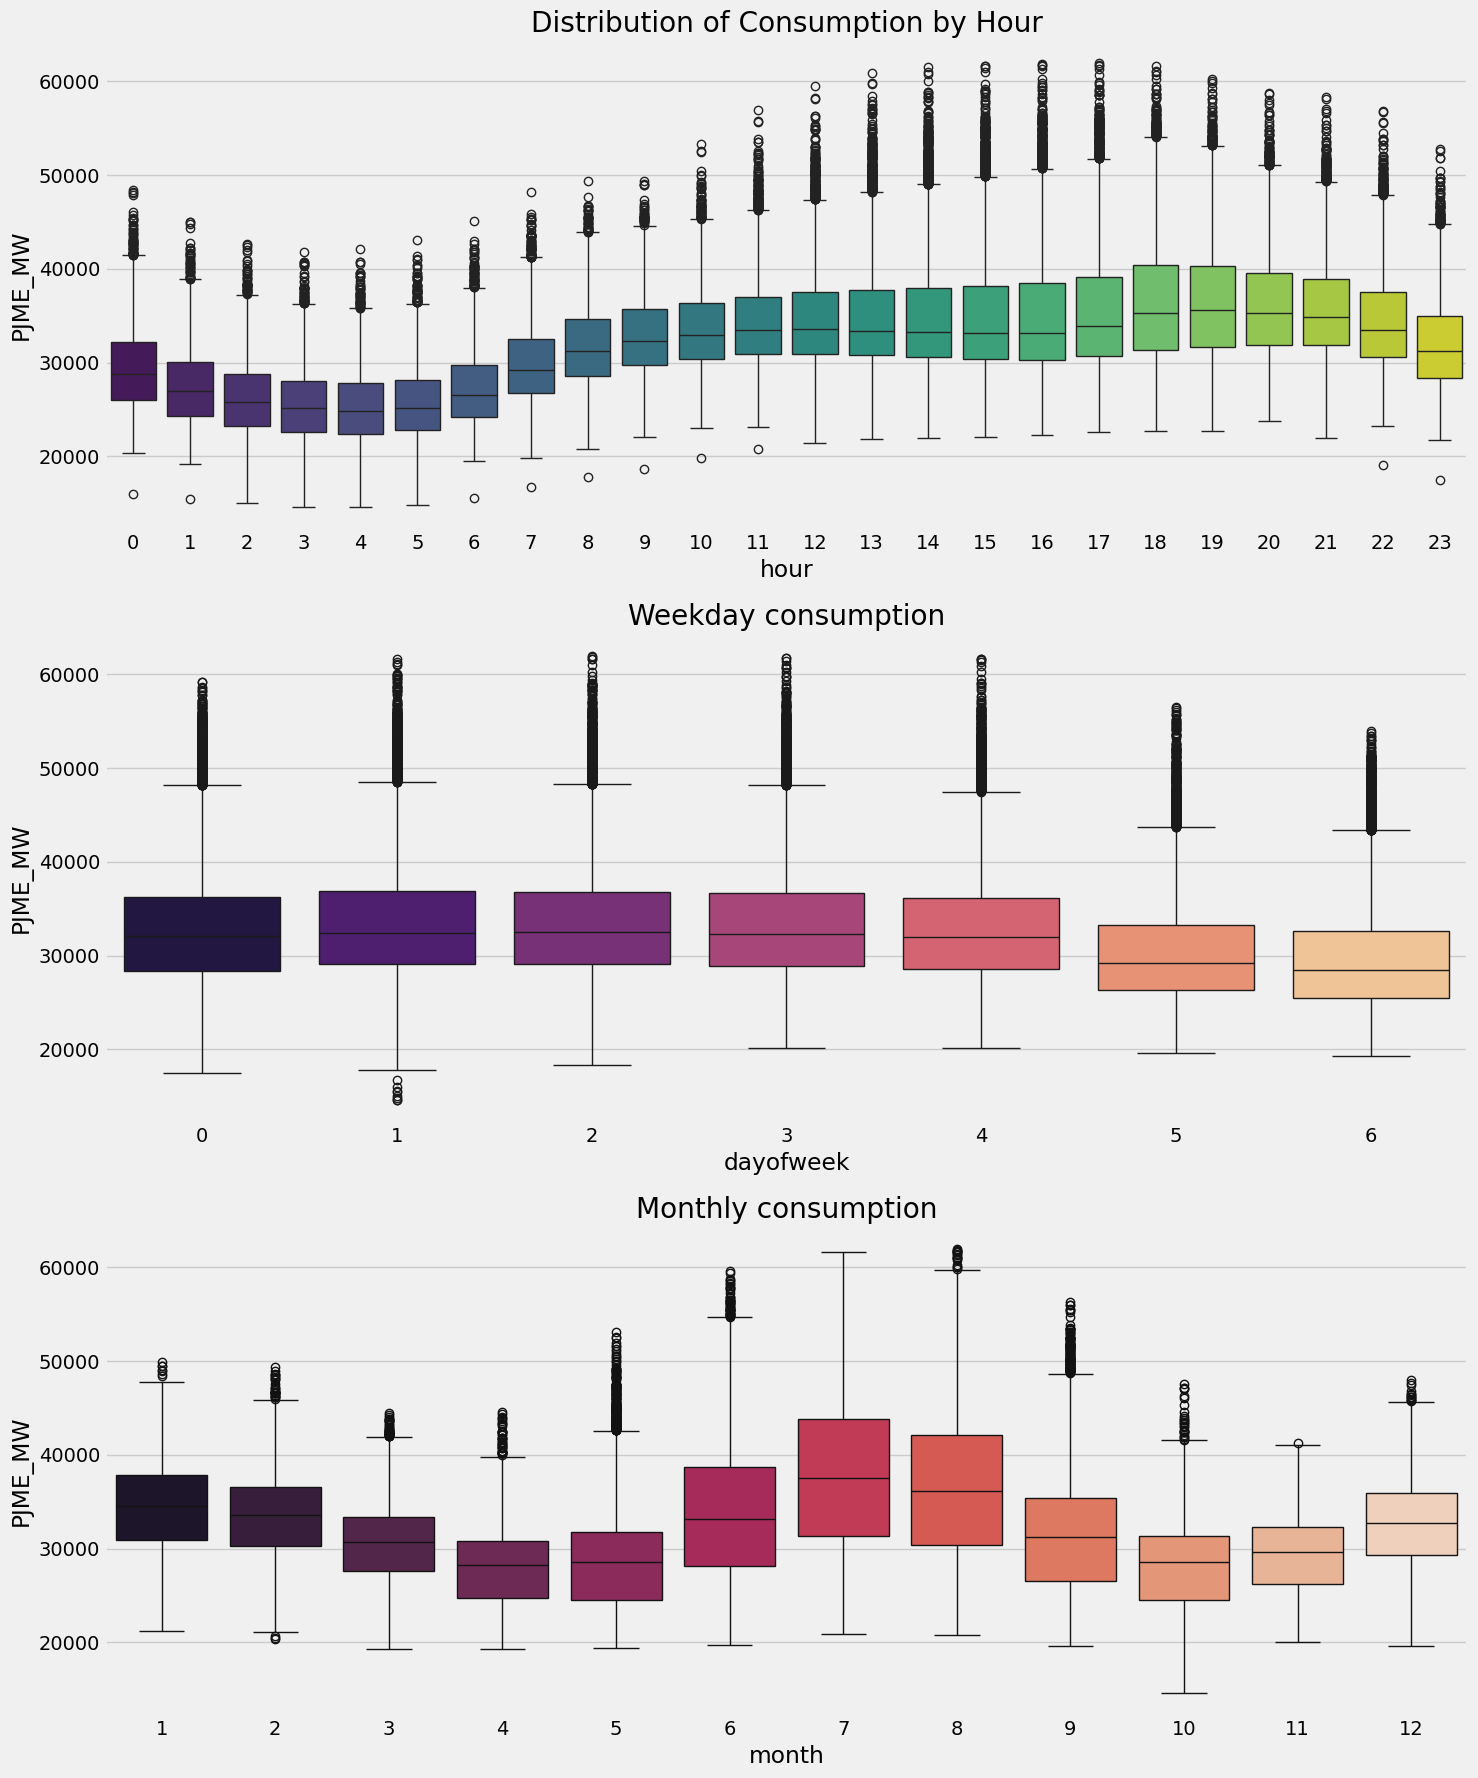

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# 1. Hourly Pattern
sns.boxplot(data=df, x='hour', y='PJME_MW', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Consumption by Hour')

# 2. Daily Pattern
sns.boxplot(data=df, x='dayofweek', y='PJME_MW', ax=axes[1], palette='magma')
axes[1].set_title('Weekday consumption')

# 3. Monthly Pattern
sns.boxplot(data=df, x='month', y='PJME_MW', ax=axes[2], palette='rocket')
axes[2].set_title('Monthly consumption')

plt.tight_layout()
plt.show()

* Theo giờ:
- Theo phân bố tiêu thụ, khoảng 0h - 7h có lượng tiêu thụ trung bình thấp hơn(có thể vì các hoạt động sản xuất chưa bắt đầu và đa số mọi người đều nghỉ ngơi trong khung giờ này)
- Lượng tiêu thụ trung bình trong các giờ còn lại cao hơn, cho thấy trong thời gian có các hoạt động sản xuất và các sinh hoạt của con người lượng tiêu thụ điện thường tăng mạnh
* Theo ngày trong tuần:
- Các ngày cuối tuần có lượng tiêu thụ trung bình thấp hơn, cho thấy các hoạt động sản xuất trong tuần có vai trò quan trọng trong tiêu thụ năng lượng
* Theo tháng:
- Các tháng có thời tiết với nhiệt độ thấp(tháng 1, 2, 12) và các tháng có nhiệt độ cao(6, 7, 8) có lượng tiêu thụ điện cao hơn, cho thấy ảnh hưởng của nhiệt độ và thời tiết đến lượng tiêu thụ. Các tháng còn lại có lượng tiêu thụ điện trung bình thấp hơn do thời tiết dễ chịu hơn
* Có các outliers, có thể liên quan đến các feature khác

C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\1662403869.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_compare, x='is_holiday', y='PJME_MW', palette='Set2')


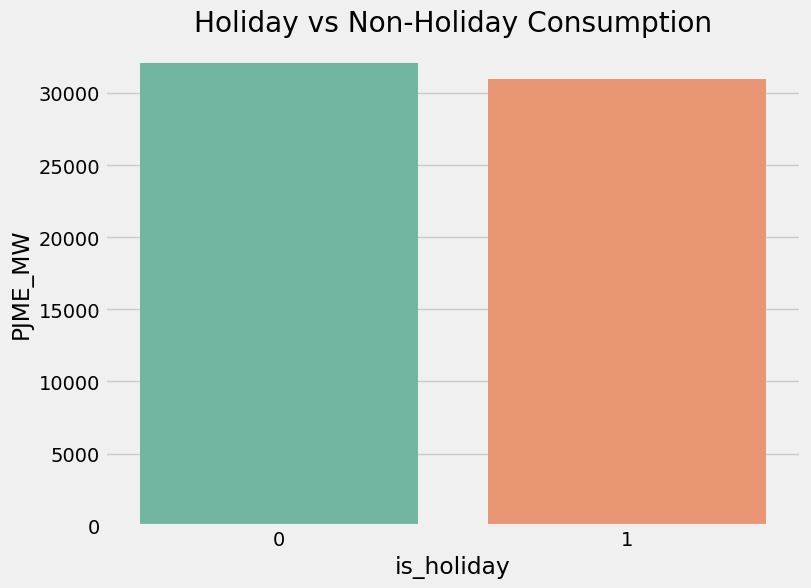

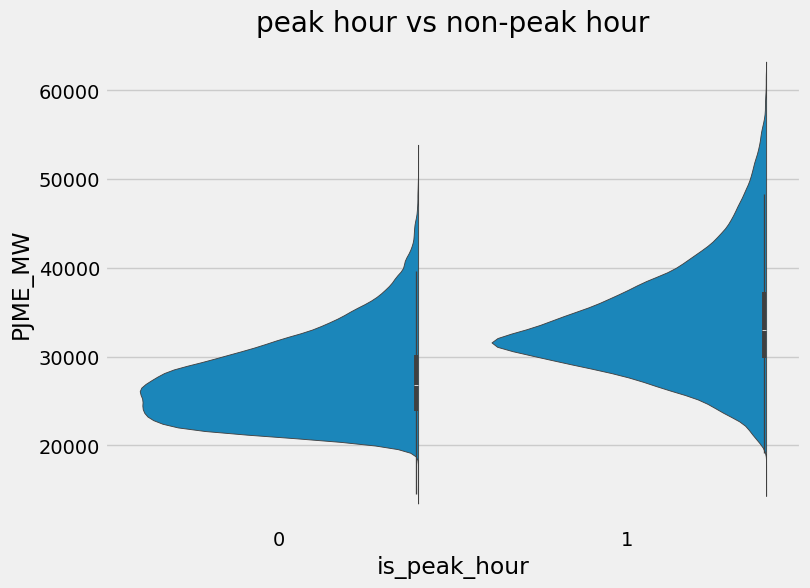

In [4]:
# So sánh ngày lễ và ngày thường
holiday_compare = df.groupby('is_holiday')['PJME_MW'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_compare, x='is_holiday', y='PJME_MW', palette='Set2')
plt.title('Holiday vs Non-Holiday Consumption')
plt.show()

# Kiểm tra tác động của Peak Hour (is_peak_hour)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='is_peak_hour', y='PJME_MW', split=True)
plt.title('peak hour vs non-peak hour')
plt.show()

- Trong các ngày nghỉ lễ(holiday), lượng tiêu thụ thường thấp hơn vì các hoạt động sản xuất dừng lại 
- Giờ cao điểm có lượng tiêu thụ cao hơn bình thường

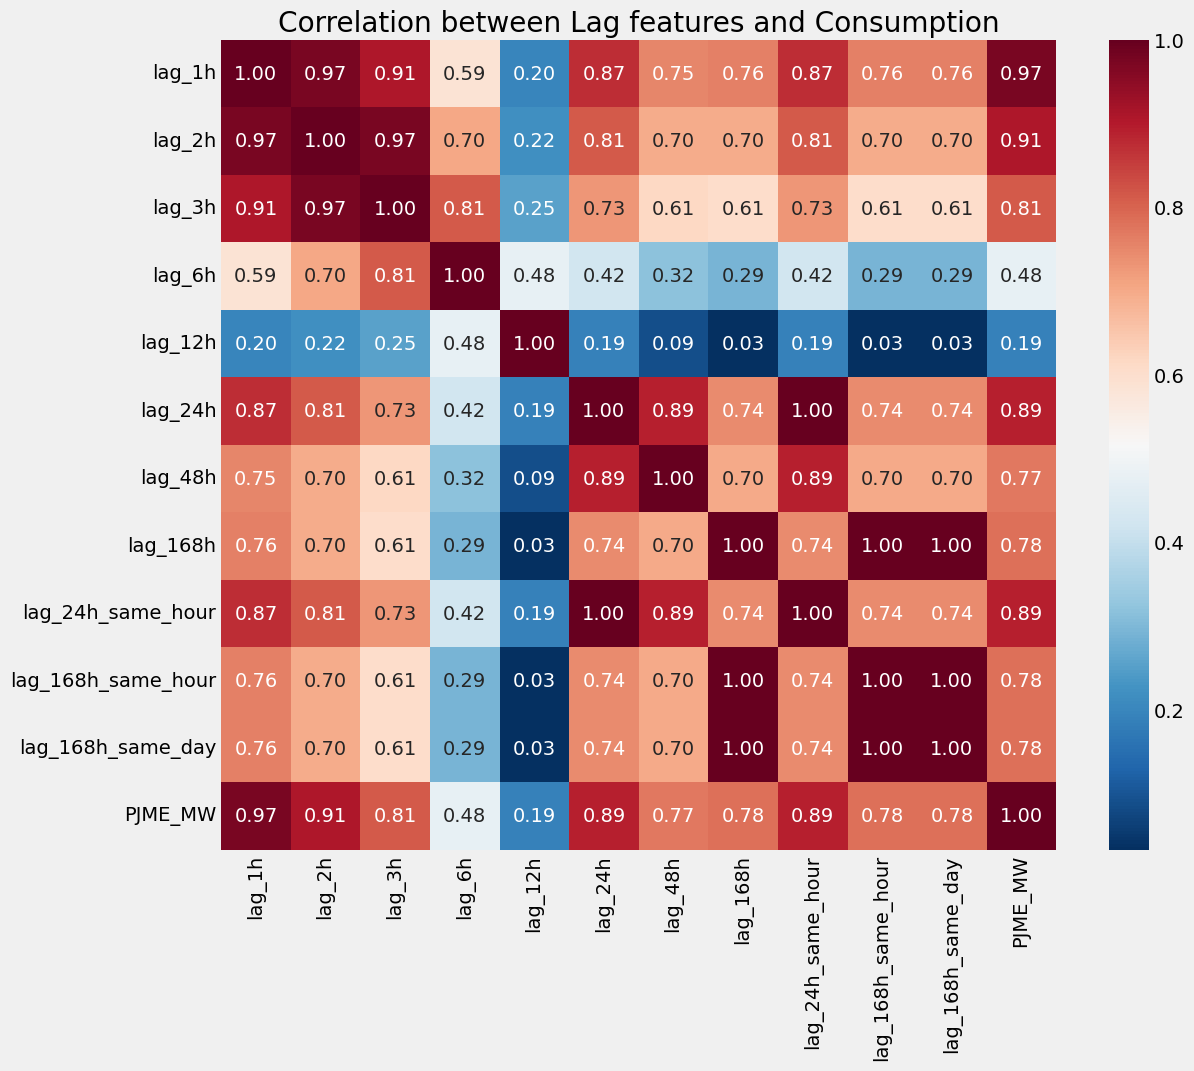

In [5]:
# Heatmap tương quan giữa các Lag features và Target
lag_cols = [col for col in df.columns if 'lag_' in col] + ['PJME_MW']
corr_matrix = df[lag_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r')
plt.title('Correlation between Lag features and Consumption')
plt.show()

- Dựa theo biểu đồ, lag_1h, lag_2h và lag_3h có correlation cao. Có thể có nghĩa là mức tiêu thụ có tính liên tục cao, có thể dựa vào các giá trị trước đó để đưa ra dự đoán
- lag_24h(1 ngày) và lag_168h(1 tuần) có correlation khá cao. Có thể liên quan đến thói quen sinh hoạt và sản xuất của con người.
- lag_12h có correlation thấp vì thường sau 12h có sự thay đổi lớn về cả sinh hoạt lẫn sản xuất. Tương tự với lag_6h

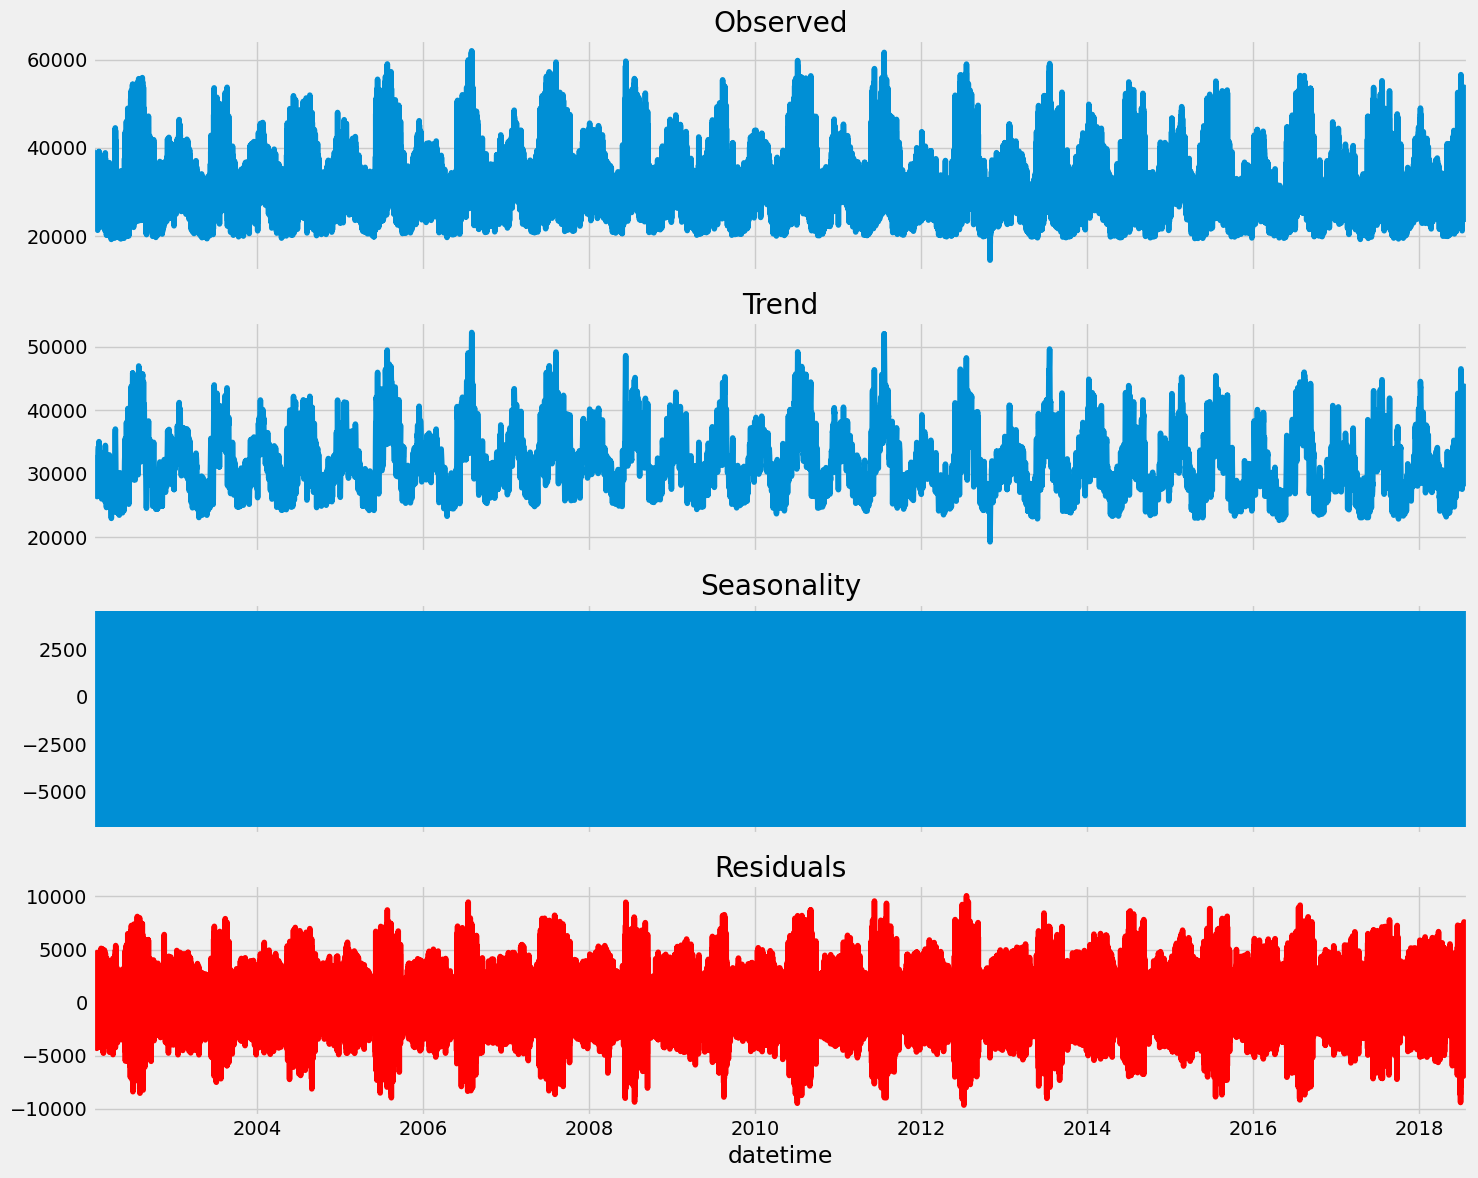

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Phân rã dữ liệu với chu kỳ 24 giờ (Daily Seasonality)
result = seasonal_decompose(df['PJME_MW'], model='additive', period=24)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonality')
result.resid.plot(ax=ax4, title='Residuals', color='red')
plt.tight_layout()
plt.show()

- seasonality cao -> các mô hình time series và các mô hình sử dụng đến các feature thời gian như hour, week, v.v... có thể cho kết quả tốt
- trend không rõ ràng, residual cao -> nên sử dụng ensemble hoặc additive models


C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\421921273.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_weekend', y='PJME_MW', palette='viridis')


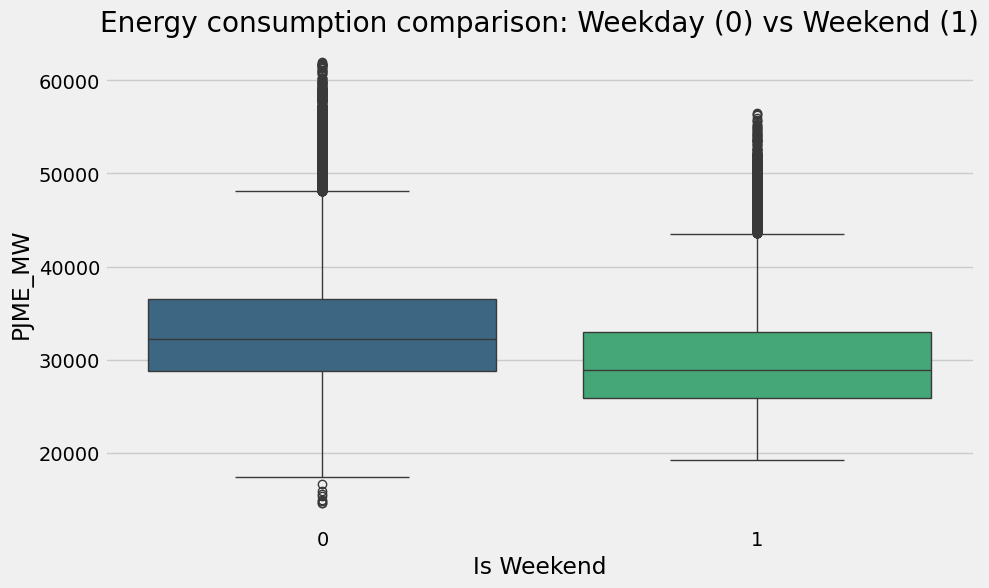

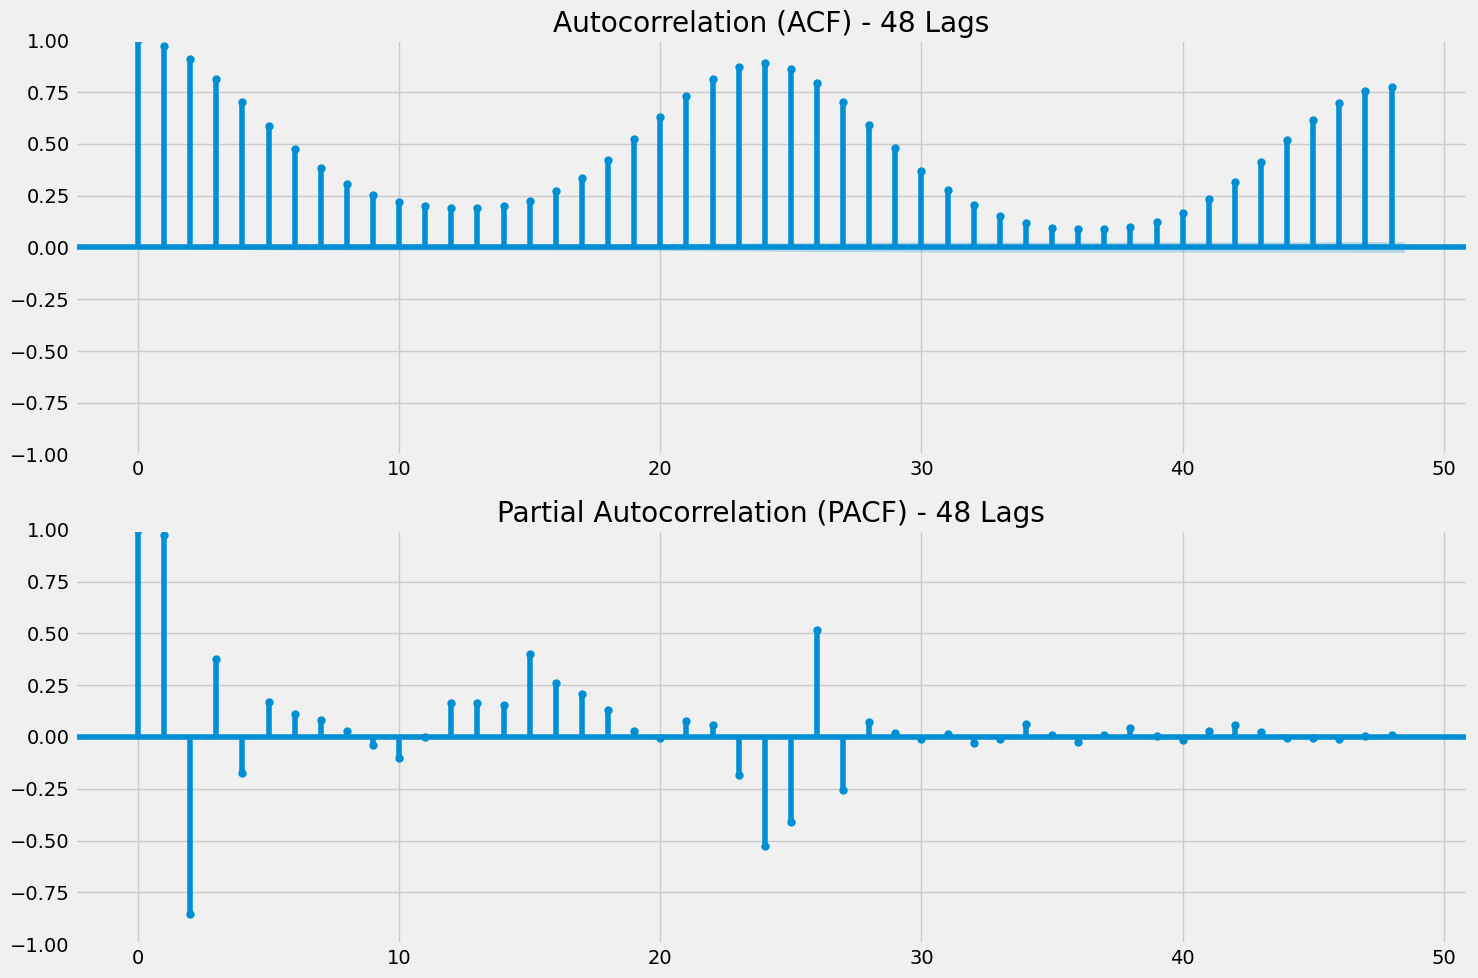

C:\Users\MY PC\AppData\Local\Temp\ipykernel_14660\421921273.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='rocket')


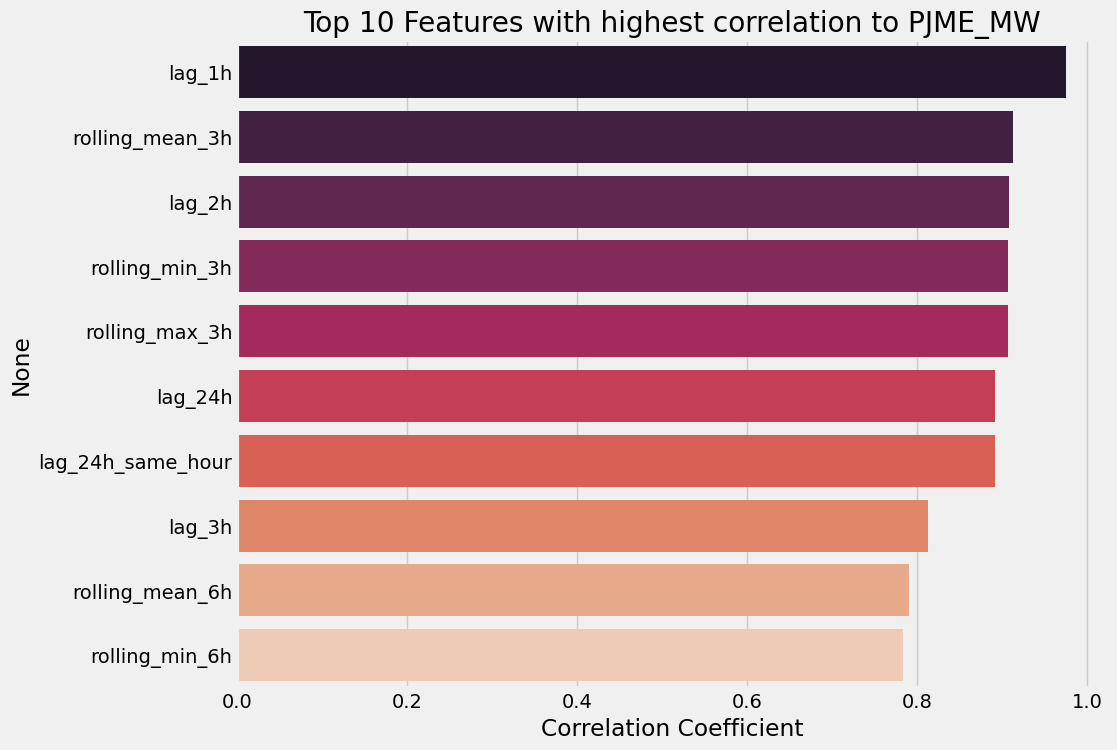

Top 10 Features:
 lag_1h               0.974793
rolling_mean_3h      0.912956
lag_2h               0.907608
rolling_min_3h       0.906579
rolling_max_3h       0.906213
lag_24h              0.891475
lag_24h_same_hour    0.891475
lag_3h               0.812659
rolling_mean_6h      0.790189
rolling_min_6h       0.783093
Name: PJME_MW, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Đảm bảo chỉ lấy các cột số để tính tương quan
numeric_df = df.select_dtypes(include=[np.number])

# 1. So sánh Weekend vs Weekday
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_weekend', y='PJME_MW', palette='viridis')
plt.title('Energy consumption comparison: Weekday (0) vs Weekend (1)')
plt.xlabel('Is Weekend')
plt.ylabel('PJME_MW')
plt.show()

# 2. Biểu đồ ACF và PACF
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(df['PJME_MW'].dropna(), lags=48, ax=ax[0]) 
ax[0].set_title('Autocorrelation (ACF) - 48 Lags')
plot_pacf(df['PJME_MW'].dropna(), lags=48, ax=ax[1])
ax[1].set_title('Partial Autocorrelation (PACF) - 48 Lags')
plt.tight_layout()
plt.show()

# 3. Tính toán tương quan cho tất cả features
all_corr = numeric_df.corr()['PJME_MW'].sort_values(ascending=False)

# 4. Lấy Top 10 features tương quan nhất
top_10_corr = all_corr.drop('PJME_MW').head(10)

# Trực quan hóa Top 10
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='rocket')
plt.title('Top 10 Features with highest correlation to PJME_MW')
plt.xlabel('Correlation Coefficient')
plt.show()

print("Top 10 Features:\n", top_10_corr)

- Bối cảnh doanh nghiệp(Business context): Việc dự báo chính xác nhu cầu năng lượng giúp các nhà vận hành lưới điện tối ưu hóa việc huy động các nhà máy điện, giảm thiểu chi phí vận hành và đảm bảo an ninh năng lượng. Sai số trong dự báo có thể dẫn đến việc thiếu hụt điện năng hoặc lãng phí nguồn lực khi duy trì công suất dự phòng quá mức cần thiết.

- Chu kì đỉnh điểm(Peak demand period): Thời gian có lượng tiêu thụ cao nhất thường rơi vào các tháng có nhiệt độ cao(tháng 6, 7, 8) và tháng có nhiệt độ thấp(tháng 1, 2, 12). Điều này cho thấy nhu cầu sử dụng điện thường tăng vào thời gian con người sử dụng điều hoà nhiệt độ nhiều do nhiệt độ cao hoặc thấp. Ngoài ra, vào thời gian từ 9h-22h hàng ngày lượng tiêu thụ cũng tăng do sinh hoạt của con người và hoạt động sản xuất. Vì vậy, hệ thống lưới điện chịu áp lực cực lớn tại các thời điểm này. Nếu dự báo sai, có thể dẫn đến tình trạng dư thừa hoặc thiếu lượng điện cần thiết.

- Ảnh hưởng chi phí(cost implication): Nếu không điều chỉnh kế hoạch phát điện cho phù hợp, chi phí sẽ tăng vô ích do hiệu suất máy phát thấp khi chạy ở tải thấp hoặc không đủ nguồn cung điện, từ đó đẩy giá điện tăng cao. Tương quan cực cao của các biến lag_1h và lag_24h cho thấy các mô hình dự báo ngắn hạn có thể đạt độ chính xác rất cao, giúp giảm thiểu rủi ro tài chính trên thị trường điện thời gian thực.

- Đề xuất thực tế(pratical recommendation): Nhà cung cấp cần dự đoán lượng điện tiêu thụ theo từng khoảng thời gian, đồng thời ưu tiên sử dụng các biến lag_1h, lag_24h, hour và is_weekend làm đầu vào chính cho các mô hình Machine Learning vì chúng có tương quan mạnh nhất với biến mục tiêu.